This Note book is a text analysis of two of Charles Darwin's novels: The Origin of Species and The Power of Movement in Plants

In [20]:
import pandas as pd
import numpy as np
import collections
import csv
import string
import nltk
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
nltk.download('twitter_samples')
nltk.download('punkt')
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
import random

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Due to the time taken to run the following code for the entire novels only the introductions are used. The following cleans the data of punction (leaving only letters), before spliting the string into words. The length of the chapter introductions provides context for specific word counts. 

In [21]:
with open('C:/Users/georg/OneDrive/Documents/books/darwin_1.txt', 'r') as darwin1:
    darwin_1= darwin1.read()
    cleanedtext = darwin_1.translate(string.punctuation)
worddf = cleanedtext.lower()
words = worddf.split()
print ('The munber of words in the introduction of "The Origin of Species" is:', len(words))

The munber of words in the introduction of "The Origin of Species" is: 1559


In [22]:
with open('C:/Users/georg/OneDrive/Documents/books/darwin_2.txt', 'r') as darwin_2:
        darwin2= darwin_2.read().replace('the','')
        cleaneddarwin=darwin2.translate(string.punctuation)
word = cleaneddarwin.lower()
wordsdarwin = word.split()
print ('The munber of words in the introduction of "The Power of Movement in Plants" is:', len(wordsdarwin))

The munber of words in the introduction of "The Power of Movement in Plants" is: 937


The following section looks at key words in the introductions

In [23]:
filtered_words = [word for word in words if word not in stopwords.words('english')]
allwords= Counter(filtered_words)
top10words= allwords.most_common(10)
print ('The Top 10 Words in ascending order are:')
print (top10words)

The Top 10 Words in ascending order are:
[('shall', 10), ('species', 9), ('facts', 7), ('relations', 6), ('subject', 5), ('one', 5), ('see', 5), ('beings', 5), ('chapter', 5), ('origin', 4)]


In [24]:
filtered_words_2= [word for word in wordsdarwin if word not in stopwords.words('english')]
allwordstocount= Counter(filtered_words_2)
top10words2= allwordstocount.most_common(10)
print ('The Top 10 Words in ascending order are:')
print (top10words2)

The Top 10 Words in ascending order are:
[('movement', 8), ('part', 8), ('increased', 7), ('side', 6), ('plant', 5), ('towards', 5), ('turgescence', 5), ('bend', 4), ('ir', 4), ('case', 4)]


Key words (minus stop words) will help researchers determine the subject of a text or chapter.

Visualising keywords can be helpful. However, it would be more useful if the books were on the same topic and the researcher was looking for the book that mentioned a specific subject more. Here there is no overlapping words.

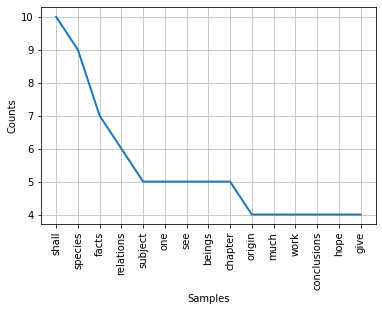

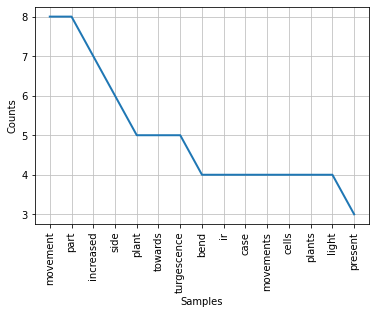

In [25]:
fdist1 = nltk.FreqDist(filtered_words)

fdist1.plot(15, cumulative=False)

fdist2 = nltk.FreqDist(filtered_words_2)

fdist2.plot(15, cumulative=False)

This is a basic sentiment analysis First a baseline was created (This code was adapted from digital ocean: 'How To Perform Sentiment Analysis in Python 3' to include neutral sentiment) 
It uses the Natural Language Toolkit (NLTK) to train the system with a databae of tweets. 
Then the texts above were put through.

In [27]:

positivetweets= twitter_samples.strings('positive_tweets.json')
negativetweets= twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    neutral_tweets = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
    neutral_tweet_tokens = twitter_samples.strings('tweets.20150430-223406.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []
    neutral_cleaned_tokens_list= []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
    for tokens in neutral_tweet_tokens:
        neutral_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)
    neutral_tokens_for_model= get_tweets_for_model(neutral_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]
    neutral_dataset = [(tweet_dict, "Neutral")
                         for tweet_dict in neutral_tokens_for_model]
    

    dataset = positive_dataset + negative_dataset + neutral_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))



Accuracy is: 0.9981739130434782
Most Informative Features
                         = None           Positi : Neutra =   1039.6 : 1.0
                       e = True           Neutra : Positi =    773.3 : 1.0
                       l = True           Neutra : Positi =    756.5 : 1.0
                       c = True           Neutra : Positi =    732.9 : 1.0
                       p = True           Neutra : Negati =    707.6 : 1.0
                       g = True           Neutra : Negati =    670.0 : 1.0
                       f = True           Neutra : Positi =    624.4 : 1.0
                       k = True           Neutra : Negati =    535.5 : 1.0
                       v = True           Neutra : Negati =    486.2 : 1.0
                       h = True           Neutra : Positi =    448.3 : 1.0
None


First, we need to test the code then we can classify the Darwin Texts

In [28]:
Test = "horrible service."
clean_test = remove_noise(word_tokenize(Test))

print(classifier.classify(dict([token, True] for token in clean_test)))

Negative


In [29]:
sentiment_analysis= remove_noise(word_tokenize(worddf))

print(classifier.classify(dict([token, True] for token in sentiment_analysis)))

Positive


In [30]:
sentiment_analysis2= remove_noise(word_tokenize(word))

print(classifier.classify(dict([token, True] for token in sentiment_analysis2)))

Positive


While both these books are classified as positive with more texts a csv file or dataframe can be made and the following code used to visualise the amount of positive vs negative texts.

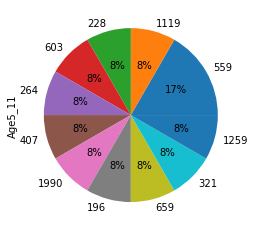

In [31]:
library_data= pd.read_csv('Downloads/librarydata.csv')
library_data.Age5_11.value_counts().plot(kind='pie', autopct='%1.0f%%')